# 🎯 Discovering Embeddings - Text as Vectors!

## 🤔 What Are Embeddings?

Imagine teaching a computer to understand language by converting words and sentences into **mathematical vectors**!

**The Magic:** 
- 📝 "The cat is sleeping" → `[0.23, -0.45, 0.87, ...]` (384 numbers!)
- 🧠 Similar meanings → Similar vectors
- 🎯 Can measure semantic similarity mathematically

---

### 🌟 Why Embeddings Are Revolutionary:

| Traditional Approach | Embeddings Approach |
|---------------------|---------------------|
| 🔤 Words as strings | 🔢 Words as vectors |
| ❌ Can't compare meanings | ✅ Can measure similarity |
| 🚫 No semantic understanding | 🧠 Captures meaning & context |
| 📏 Fixed vocabulary | 🌐 Handles any text |

---

### 🎓 What You'll Learn:

1. 🤖 **Load pre-trained models** - Use powerful sentence transformers
2. 🔄 **Convert text to vectors** - See embeddings in action
3. 📊 **Measure similarity** - Compare semantic meaning
4. 🎨 **Visualize embeddings** - See language in 2D space
5. 💡 **Real applications** - Discover practical use cases

Let's dive in! 🚀

### 📦 The Model We'll Use:

**`text-embedding-3-small`**
- Supports multiple languages (English, French, Spanish, etc.)
- Creates 1536-dimensional vectors
- Optimized for semantic similarity tasks
- Perfect balance of speed and accuracy


- 🌍 **Multilingual:** Works in 50+ languages
- ⚡ **Fast:** Encodes sentences in seconds
- 🎯 **Accurate:** State-of-the-art semantic understanding

Let's load it!

In [2]:
from dotenv import load_dotenv
from langchain_openai import OpenAIEmbeddings

# Load the pre-trained model

load_dotenv()

# Initialize the embedding model

embedding_model = OpenAIEmbeddings(
    model="text-embedding-3-small",
    # With the `text-embedding-3` class
    # of models, you can specify the size
    # of the embeddings you want returned.
    # dimensions=1024
)


print("✅ Model loaded successfully!")
print(f"   Model can handle: Multiple languages")
print(f"   Embedding dimension: 1536")
print(f"   Ready to convert text to vectors! 🚀")

✅ Model loaded successfully!
   Model can handle: Multiple languages
   Embedding dimension: 1536
   Ready to convert text to vectors! 🚀


---

# 🔄 Creating Your First Embedding

Let's convert a simple sentence into a vector!

In [3]:
# Our input sentence
input_str = "The weather is beautiful"

# Convert to embedding (vector)
embedding = embedding_model.embed_query(input_str)

print(f"📝 Input sentence: '{input_str}'")
print(f"\n🔢 Embedding (vector representation):")
print(f"   First 10 values: {embedding[:10]}")
print(f"   ...")
print(f"   Last 10 values: {embedding[-10:]}")
print(f"\n📊 Each number captures different semantic aspects!")

📝 Input sentence: 'The weather is beautiful'

🔢 Embedding (vector representation):
   First 10 values: [0.010934686288237572, -0.027822494506835938, -0.011565890163183212, 0.010940873995423317, 0.026065023615956306, -0.01712915115058422, 0.0015609929105266929, -0.011058451607823372, -0.025891752913594246, -0.011293605901300907]
   ...
   Last 10 values: [0.026461074128746986, 0.011702032759785652, 0.0010303481249138713, -0.006079982500523329, 0.020446067675948143, 0.057130176573991776, -0.004919680301100016, -0.034307811409235, 0.0036139539442956448, 0.013304796069860458]

📊 Each number captures different semantic aspects!


In [4]:
# Check the dimension
dimension = len(embedding)

print(f"📏 Embedding dimension: {dimension}")
print(f"\n💡 This means our sentence is represented by {dimension} numbers!")
print(f"   Each dimension captures different aspects of meaning:")
print(f"   • Some dimensions might encode 'weather' concepts")
print(f"   • Others might encode positive sentiment")
print(f"   • Together, they form a unique 'fingerprint' of the sentence")

📏 Embedding dimension: 1536

💡 This means our sentence is represented by 1536 numbers!
   Each dimension captures different aspects of meaning:
   • Some dimensions might encode 'weather' concepts
   • Others might encode positive sentiment
   • Together, they form a unique 'fingerprint' of the sentence


---

# 📊 Measuring Similarity

Now for the **magic** - let's compare multiple sentences and see which ones are semantically similar!

## 🧪 The Experiment:

We'll compare three sentences:
1. "The weather is lovely today" 🌞
2. "It's so sunny outside!" ☀️
3. "He drove to the stadium" 🚗

**Prediction:** Sentences 1 & 2 should be similar (both about weather), while 3 should be different.

Let's test this!

In [ ]:
import numpy as np

# Our test sentences
inputs = [
    "The weather is lovely today.",
    "It's so sunny outside!",
    "He drove to the stadium.",
]

print("🔄 Converting sentences to embeddings...")
embeddings = embedding_model.embed_documents(inputs)

print("📊 Computing similarity matrix...")
embeddings = np.array(embeddings)
similarities = np.dot(embeddings, embeddings.T)

print("\n✅ Complete! Let's visualize the results...")
print(f"\n📐 Similarity matrix shape: {similarities.shape}")
print(f"   (3 sentences × 3 sentences = 9 similarity scores)")

🔄 Converting sentences to embeddings...
📊 Computing similarity matrix...

✅ Complete! Let's visualize the results...

📐 Similarity matrix shape: (3, 3)
   (3 sentences × 3 sentences = 9 similarity scores)


## 🎨 Creating a Visualization Function

Let's make a beautiful heatmap to visualize similarities!

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def compute_and_display_similarities(inputs, title="Semantic Similarity Heatmap"):
    """
    Compute and display a beautiful heatmap of sentence similarities

    Args:
        inputs: List of sentences to compare
        title: Title for the plot
    """
    # Compute embeddings and similarities
    embeddings = embedding_model.embed_documents(inputs)
    embeddings = np.array(embeddings)
    similarities = np.dot(embeddings, embeddings.T)

    # Create figure
    plt.figure(figsize=(12, 10))

    # Create heatmap
    ax = sns.heatmap(
        similarities,
        annot=True,  # Show values
        fmt=".3f",  # 3 decimal places
        xticklabels=inputs,
        yticklabels=inputs,
        cmap="YlGnBu",  # Yellow-Green-Blue colormap
        cbar_kws={"label": "Similarity Score"},
        vmin=0,  # Minimum value
        vmax=1,  # Maximum value
        square=True,  # Square cells
        linewidths=0.5,  # Grid lines
        linecolor="gray",
    )

    # Styling
    plt.title(title, fontsize=16, fontweight="bold", pad=20)
    plt.xlabel("Sentences", fontsize=12, fontweight="bold")
    plt.ylabel("Sentences", fontsize=12, fontweight="bold")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Print interpretation
    print("\n📖 How to read this heatmap:")
    print("   • 1.0 (dark blue) = Perfect similarity (same sentence)")
    print("   • 0.8-0.9 = Very similar meaning")
    print("   • 0.5-0.7 = Somewhat related")
    print("   • 0.0-0.4 = Different meanings")
    print("   • 0.0 (light yellow) = Completely different")


print("✅ Visualization function created!")

✅ Visualization function created!


🎨 Generating similarity heatmap...



/var/folders/wm/_y3_hpg533s10kc44cqz2fxw0000gn/T/ipykernel_51794/1666027839.py:43: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/aniszakari/Documents/ai-training-for-devs/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


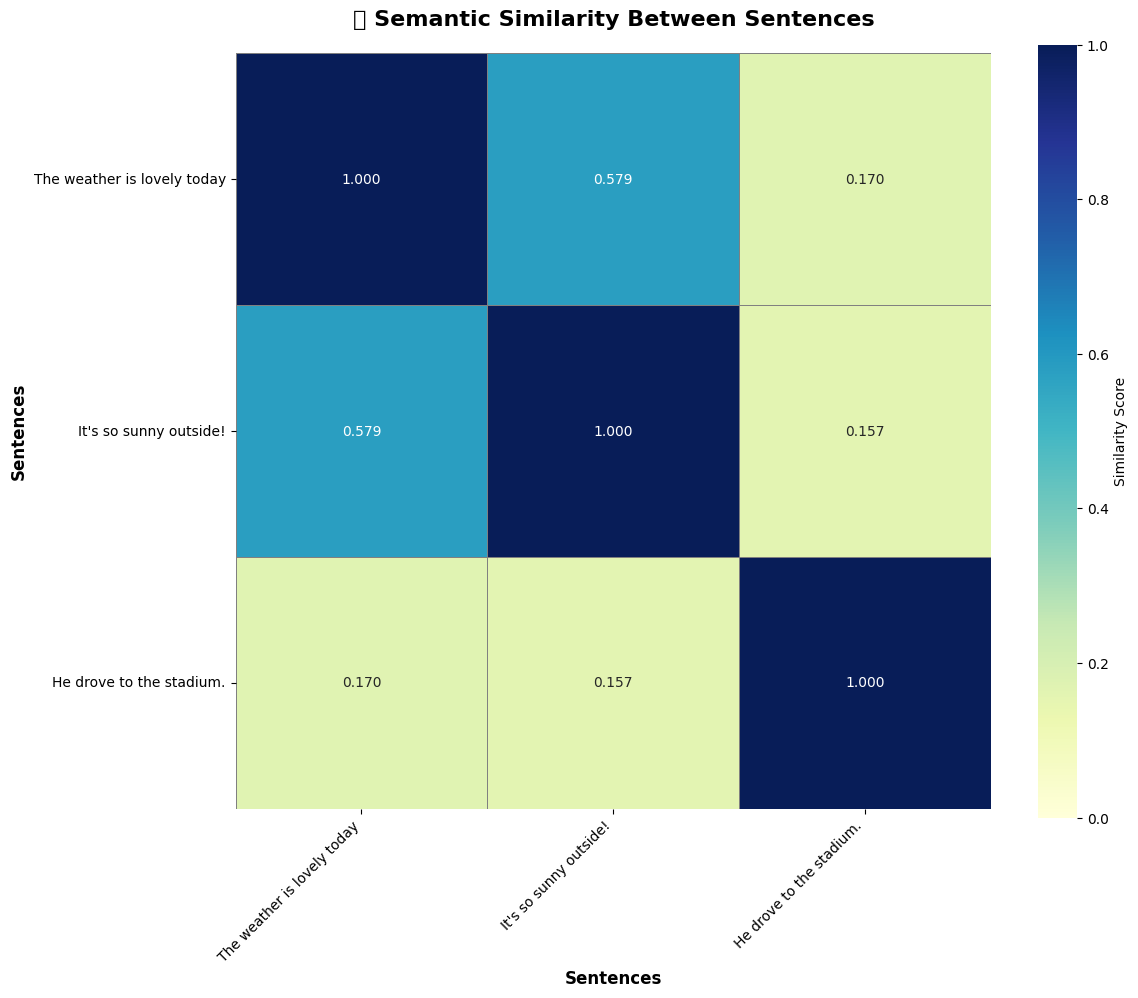


📖 How to read this heatmap:
   • 1.0 (dark blue) = Perfect similarity (same sentence)
   • 0.8-0.9 = Very similar meaning
   • 0.5-0.7 = Somewhat related
   • 0.0-0.4 = Different meanings
   • 0.0 (light yellow) = Completely different

🔍 Observations:
   ✅ Sentences 1 & 2 have HIGH similarity (both about weather)
   ❌ Sentence 3 has LOW similarity with others (different topic)
   🎯 The model understands semantic meaning, not just word matching!


In [12]:
# Test with our sentences
inputs = [
    "The weather is lovely today",
    "It's so sunny outside!",
    "He drove to the stadium.",
]

print("🎨 Generating similarity heatmap...\n")
compute_and_display_similarities(inputs, "🌟 Semantic Similarity Between Sentences")

print("\n🔍 Observations:")
print("   ✅ Sentences 1 & 2 have HIGH similarity (both about weather)")
print("   ❌ Sentence 3 has LOW similarity with others (different topic)")
print("   🎯 The model understands semantic meaning, not just word matching!")

### 🌍 Multilingual Magic!

Our model works across languages! Let's test with French and English:

🌍 Testing multilingual understanding...



/var/folders/wm/_y3_hpg533s10kc44cqz2fxw0000gn/T/ipykernel_51794/1666027839.py:43: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/aniszakari/Documents/ai-training-for-devs/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


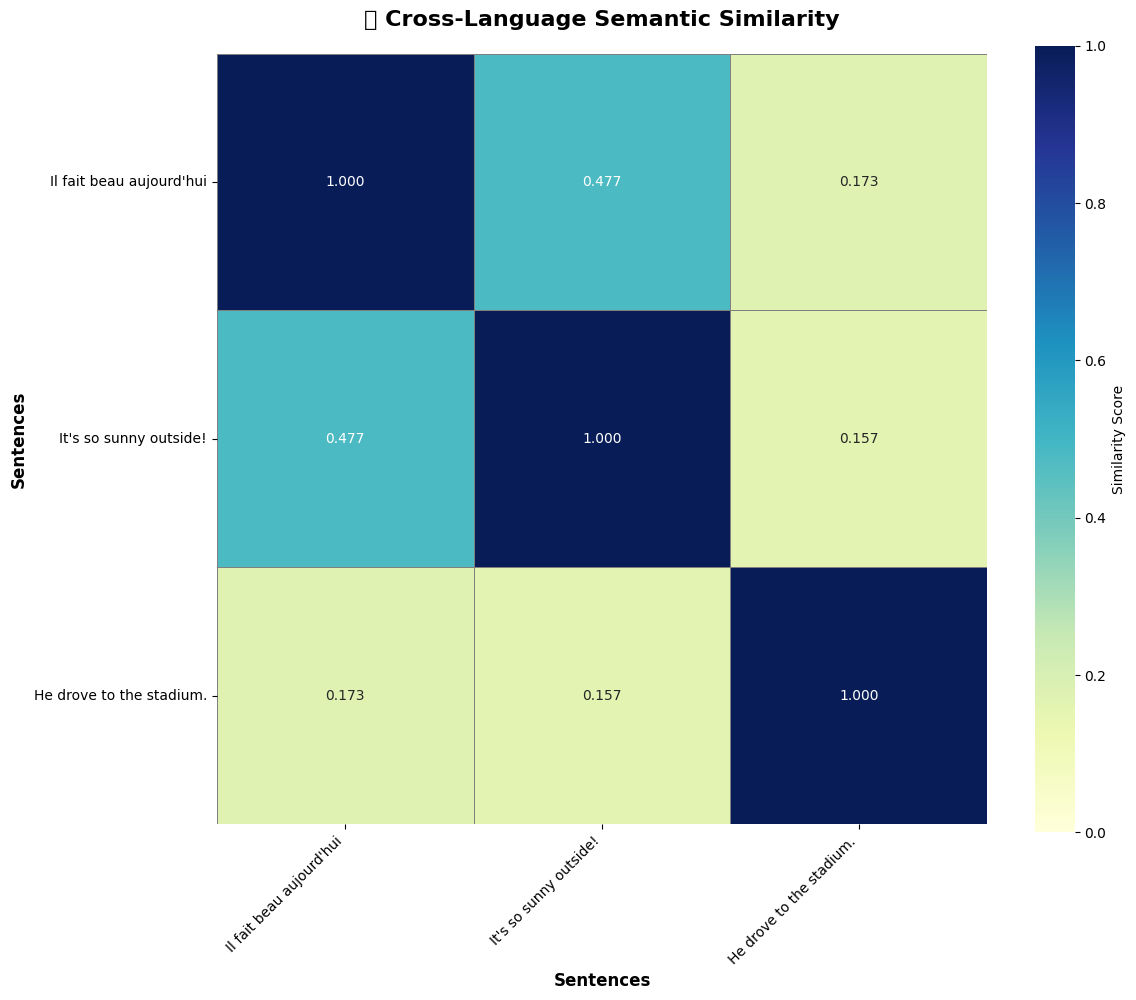


📖 How to read this heatmap:
   • 1.0 (dark blue) = Perfect similarity (same sentence)
   • 0.8-0.9 = Very similar meaning
   • 0.5-0.7 = Somewhat related
   • 0.0-0.4 = Different meanings
   • 0.0 (light yellow) = Completely different

🤯 Amazing! The model recognizes that:
   • French 'Il fait beau' ≈ English 'sunny outside'
   • Despite different languages, it captures the SAME meaning!
   • This is the power of multilingual embeddings! 🚀


In [ ]:
# Mix French and English!
multilingual_inputs = [
    "Il fait beau aujourd'hui",  # French: "The weather is nice today"
    "It's so sunny outside!",  # English
    "He drove to the stadium.",  # English (different topic)
]

print("🌍 Testing multilingual understanding...\n")
compute_and_display_similarities(
    multilingual_inputs, "🌐 Cross-Language Semantic Similarity"
)

print("\n🤯 Amazing! The model recognizes that:")
print("   • French 'Il fait beau' ≈ English 'sunny outside'")
print("   • Despite different languages, it captures the SAME meaning!")
print("   • This is the power of multilingual embeddings! 🚀")

---

# 🧪 Hands-On Exercise: Understanding Similarity Metrics

## 🎯 Goal

Explore how **cosine similarity** and **Euclidean distance** behave with embeddings.

### 📐 Two Ways to Compare Vectors:

| Metric | Formula | What it measures |
|--------|---------|------------------|
| **Cosine Similarity** | $\frac{u \cdot v}{\|u\| \|v\|}$ | Angle between vectors (0-1) |
| **Euclidean Distance** | $\|u - v\|$ | Straight-line distance |

---

### 🤔 Why Does This Matter?

**Cosine similarity** is preferred for text because:
- 🎯 Focuses on **direction** (meaning) not magnitude (length)
- 📏 Normalized to 0-1 range (easy to interpret)
- 🎨 More robust to text length variations

Let's see this in action!

## 🔧 Implementing Similarity Functions

In [ ]:
import numpy as np


def cosine_similarity(u, v):
    """
    Calculate cosine similarity between two vectors

    Returns a value between 0 and 1:
    - 1.0 = vectors point in same direction (very similar)
    - 0.0 = vectors are perpendicular (unrelated)
    """
    u, v = np.array(u), np.array(v)
    # Normalize vectors to unit length
    u_norm = u / np.linalg.norm(u)
    v_norm = v / np.linalg.norm(v)
    # Dot product of normalized vectors
    return u_norm @ v_norm


def euclidean_distance(u, v):
    """
    Calculate Euclidean distance between two vectors

    Returns the straight-line distance:
    - 0.0 = identical vectors
    - Larger values = more different
    """
    u, v = np.array(u), np.array(v)
    return np.linalg.norm(u - v)


print("✅ Similarity functions defined!")
print("\n📊 Available metrics:")
print("   1. cosine_similarity(u, v) → 0 to 1 (higher = more similar)")
print("   2. euclidean_distance(u, v) → 0 to ∞ (lower = more similar)")

✅ Similarity functions defined!

📊 Available metrics:
   1. cosine_similarity(u, v) → 0 to 1 (higher = more similar)
   2. euclidean_distance(u, v) → 0 to ∞ (lower = more similar)


## 🐱 Test Sentences: The Cat Family

We'll compare three sentences of increasing length, all about cats:

In [ ]:
# Three sentences about cats, with increasing detail
phrase_chat_1 = "the cat is a feline"
phrase_chat_2 = "the cat is a feline, the cat is a feline"
phrase_chat_3 = (
    "the cat is a feline, the cat is a feline, the cat is a feline, the cat is a feline"
)

print("🐱 Our test sentences:\n")
print(f"1️⃣  SHORT: '{phrase_chat_1}'")
print(f"    Length: {len(phrase_chat_1)} characters\n")

print(f"2️⃣  MEDIUM: '{phrase_chat_2}'")
print(f"    Length: {len(phrase_chat_2)} characters\n")

print(f"3️⃣  LONG: '{phrase_chat_3}'")
print(f"    Length: {len(phrase_chat_3)} characters\n")

print("💡 All three sentences are about cats, but with different lengths!")

🐱 Our test sentences:

1️⃣  SHORT: 'the cat is a feline'
    Length: 19 characters

2️⃣  MEDIUM: 'the cat is a feline, the cat is a feline'
    Length: 40 characters

3️⃣  LONG: 'the cat is a feline, the cat is a feline, the cat is a feline, the cat is a feline'
    Length: 82 characters

💡 All three sentences are about cats, but with different lengths!


In [28]:
# Generate embeddings
print("🔄 Converting sentences to embeddings...\n")

phrase_chat_1_emb = embedding_model.embed_query(phrase_chat_1)
phrase_chat_2_emb = embedding_model.embed_query(phrase_chat_2)
phrase_chat_3_emb = embedding_model.embed_query(phrase_chat_3)

print("✅ Embeddings created!")
print(f"   Each is a {len(phrase_chat_1_emb)}-dimensional vector")

🔄 Converting sentences to embeddings...

✅ Embeddings created!
   Each is a 1536-dimensional vector


---

## 📏 Task 1: Calculate Euclidean Distance

Now let's compare using **Euclidean distance**.

**What to expect:** Lower values mean more similar!

In [ ]:
# Calculate all pairwise Euclidean distances
print("📏 Euclidean Distance Results:\n")
print("=" * 60)


# Sentence 1 vs Sentence 3
dist_1_3 = euclidean_distance(phrase_chat_1_emb, phrase_chat_3_emb)
print(f"📐 Short vs Long:    {dist_1_3:.4f}")

dist_1_2 = euclidean_distance(phrase_chat_1_emb, phrase_chat_2_emb)
print(f"📐 Short vs Medium:  {dist_1_2:.4f}")

# Sentence 2 vs Sentence 3
dist_2_3 = euclidean_distance(phrase_chat_2_emb, phrase_chat_3_emb)
print(f"📐 Medium vs Long:   {dist_2_3:.4f}")

print("=" * 60)

# Analysis
print("\n🔍 Observations:")
print(f"   • Distances INCREASE with text length difference")
print(f"   • Short vs Long has LARGEST distance: {dist_1_3:.4f}")
print(f"   • Medium vs Long has SMALLEST distance: {dist_2_3:.4f}")
print(f"\n⚠️  Problem: Euclidean distance is affected by vector magnitude!")
print(f"   Longer texts → larger vectors → larger distances")
print(f"   Even if the MEANING is similar!")

📏 Euclidean Distance Results:

📐 Short vs Long:    0.5505
📐 Short vs Medium:  0.4474
📐 Medium vs Long:   0.3819

🔍 Observations:
   • Distances INCREASE with text length difference
   • Short vs Long has LARGEST distance: 0.5505
   • Medium vs Long has SMALLEST distance: 0.3819

⚠️  Problem: Euclidean distance is affected by vector magnitude!
   Longer texts → larger vectors → larger distances
   Even if the MEANING is similar!


---

## 📊 Task 2: Calculate Cosine Similarity

Compare each pair of sentences using **cosine similarity**.

**What to expect:** Values close to 1 mean very similar meanings!

In [31]:
# Calculate all pairwise cosine similarities
print("📊 Cosine Similarity Results:\n")
print("=" * 60)

# Sentence 1 vs Sentence 2
sim_1_2 = cosine_similarity(phrase_chat_1_emb, phrase_chat_2_emb)
print(f"🐱 Short vs Medium:  {sim_1_2:.4f}")

# Sentence 1 vs Sentence 3
sim_1_3 = cosine_similarity(phrase_chat_1_emb, phrase_chat_3_emb)
print(f"🐱 Short vs Long:    {sim_1_3:.4f}")

# Sentence 2 vs Sentence 3
sim_2_3 = cosine_similarity(phrase_chat_2_emb, phrase_chat_3_emb)
print(f"🐱 Medium vs Long:   {sim_2_3:.4f}")

print("=" * 60)

# Analysis
print("\n🔍 Observations:")
avg_similarity = (sim_1_2 + sim_1_3 + sim_2_3) / 3
print(f"   • Average similarity: {avg_similarity:.4f}")
print(f"   • All values are HIGH (close to 1.0)")
print(f"   • The model recognizes they're all about CATS! 🐱")
print(f"   • Text length doesn't drastically affect similarity")
print(f"\n💡 Cosine similarity focuses on MEANING, not LENGTH!")

📊 Cosine Similarity Results:

🐱 Short vs Medium:  0.8999
🐱 Short vs Long:    0.8484
🐱 Medium vs Long:   0.9271

🔍 Observations:
   • Average similarity: 0.8918
   • All values are HIGH (close to 1.0)
   • The model recognizes they're all about CATS! 🐱
   • Text length doesn't drastically affect similarity

💡 Cosine similarity focuses on MEANING, not LENGTH!


---

## 🤔 Task 3: Why Cosine Similarity?

### 💡 Key Insight:

Let's compare the two metrics side by side:

In [32]:
import pandas as pd

# Create comparison table
comparison_data = {
    "Comparison": ["Short vs Medium", "Short vs Long", "Medium vs Long"],
    "Cosine Similarity": [f"{sim_1_2:.4f}", f"{sim_1_3:.4f}", f"{sim_2_3:.4f}"],
    "Euclidean Distance": [f"{dist_1_2:.4f}", f"{dist_1_3:.4f}", f"{dist_2_3:.4f}"],
}

df = pd.DataFrame(comparison_data)
print("📊 Metric Comparison:\n")
print(df.to_string(index=False))

print("\n" + "=" * 70)
print("🎯 CONCLUSION: Why Cosine Similarity Wins for Text")
print("=" * 70)

print("\n✅ Cosine Similarity Advantages:")
print("   1. 📐 Length-invariant: Not affected by text length")
print("   2. 🎯 Semantic focus: Measures meaning, not magnitude")
print("   3. 📊 Normalized: Always between 0 and 1 (easy to interpret)")
print("   4. 🔄 Consistent: Similar meanings = similar scores")

print("\n❌ Euclidean Distance Disadvantages:")
print("   1. 📏 Length-sensitive: Longer texts → larger distances")
print("   2. 🎭 Misleading: Can be large even for similar meanings")
print("   3. ⚖️ Not normalized: Hard to interpret absolute values")
print("   4. 📉 Inconsistent: Same meaning, different distance based on length")

print("\n🌟 This is why NLP systems use COSINE SIMILARITY! 🌟")

📊 Metric Comparison:

     Comparison Cosine Similarity Euclidean Distance
Short vs Medium            0.8999             0.4474
  Short vs Long            0.8484             0.5505
 Medium vs Long            0.9271             0.3819

🎯 CONCLUSION: Why Cosine Similarity Wins for Text

✅ Cosine Similarity Advantages:
   1. 📐 Length-invariant: Not affected by text length
   2. 🎯 Semantic focus: Measures meaning, not magnitude
   3. 📊 Normalized: Always between 0 and 1 (easy to interpret)
   4. 🔄 Consistent: Similar meanings = similar scores

❌ Euclidean Distance Disadvantages:
   1. 📏 Length-sensitive: Longer texts → larger distances
   2. 🎭 Misleading: Can be large even for similar meanings
   3. ⚖️ Not normalized: Hard to interpret absolute values
   4. 📉 Inconsistent: Same meaning, different distance based on length

🌟 This is why NLP systems use COSINE SIMILARITY! 🌟


---

# 🎨 Visualizing Embeddings in 2D

## 🤯 The Challenge

Our embeddings have **384 dimensions** - impossible to visualize directly!

**Solution:** Use **UMAP** (Uniform Manifold Approximation and Projection)
- 🎯 Reduces 384D → 2D while preserving relationships
- 🎨 Keeps similar items close together
- 👀 Makes patterns visible to human eyes

---

## 🧪 The Experiment

We'll embed words from **two different domains**:
- 🐾 **Animals:** Cat, Dog, Elephant, Tiger, Lion
- 💻 **Technology:** Phone, Antenna, Modem, Router, Cable

**Hypothesis:** Words from the same domain should cluster together!

In [ ]:
# Our test words
elements = [
    # Animals
    "Cat",
    "Dog",
    "Elephant",
    "Tiger",
    "Lion",
    # Technology
    "Phone",
    "Antenna",
    "Modem",
    "Router",
    "Cable",
]

# Categories for coloring
categories = [
    "Animals",
    "Animals",
    "Animals",
    "Animals",
    "Animals",
    "Technology",
    "Technology",
    "Technology",
    "Technology",
    "Technology",
]

print("📋 Test Words:")
print("\n🐾 Animals:")
print("   " + ", ".join(elements[:5]))
print("\n💻 Technology:")
print("   " + ", ".join(elements[5:]))
print("\n🎯 Goal: See if embeddings naturally separate these domains!")

📋 Test Words:

🐾 Animals:
   Cat, Dog, Elephant, Tiger, Lion

💻 Technology:
   Phone, Antenna, Modem, Router, Cable

🎯 Goal: See if embeddings naturally separate these domains!


🔄 Step 1: Creating 1536D embeddings...
   ✅ Created 10 embeddings of 1536 dimensions each

📉 Step 2: Reducing 384D → 2D with UMAP...


/Users/aniszakari/Documents/ai-training-for-devs/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


   ✅ Reduced to 2D coordinates

🎨 Step 3: Creating visualization...



/var/folders/wm/_y3_hpg533s10kc44cqz2fxw0000gn/T/ipykernel_51794/1279728361.py:60: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/aniszakari/Documents/ai-training-for-devs/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


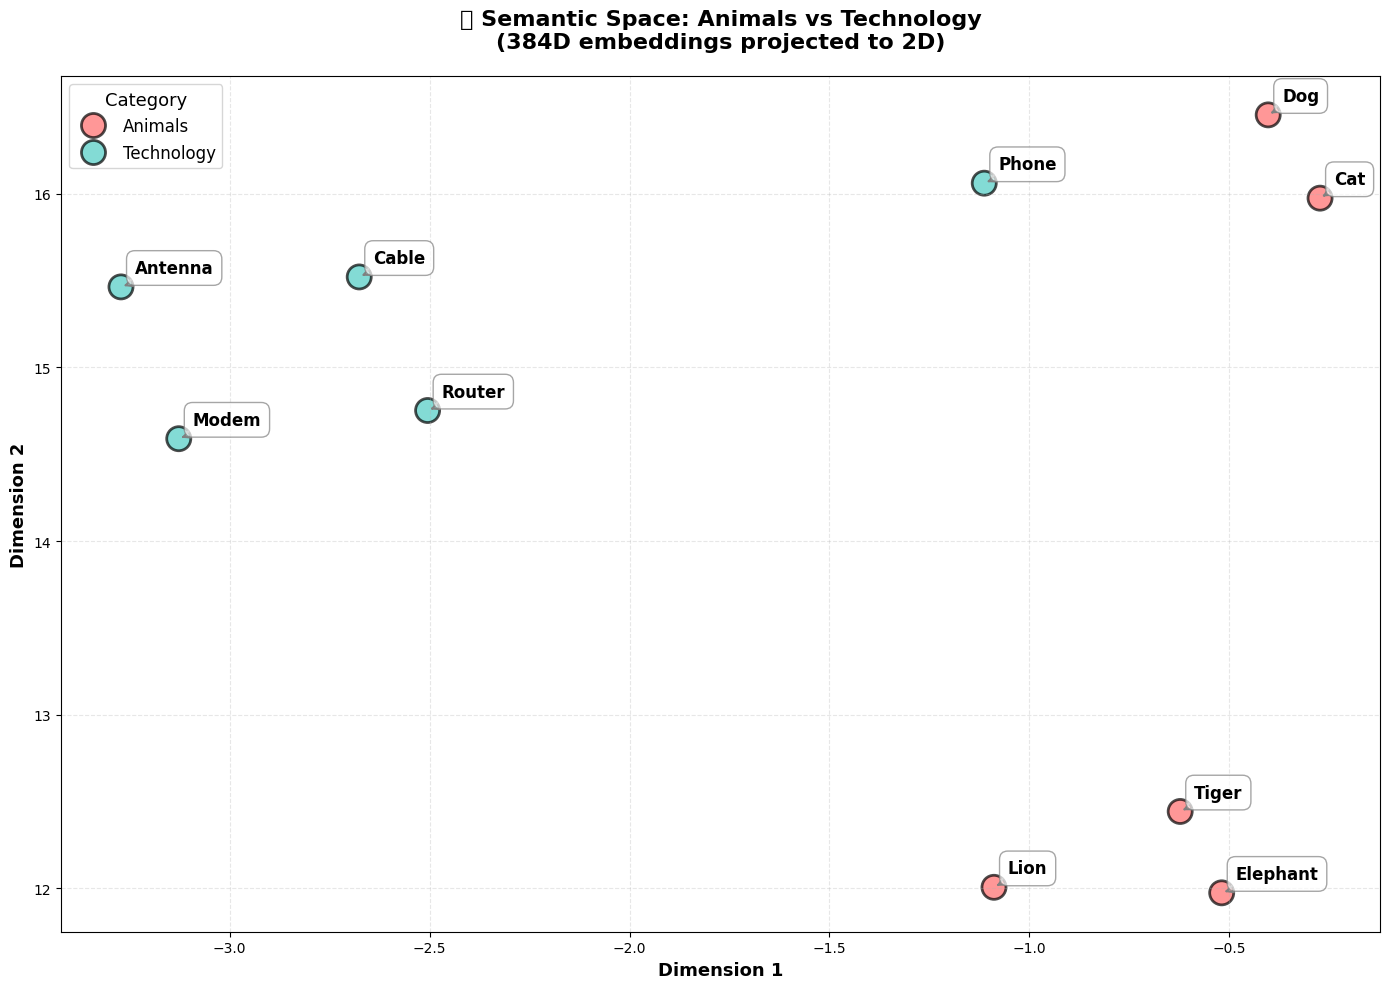


🔍 Analysis:
   🐾 RED cluster = Animals (Cat, Dog, Elephant, Tiger, Lion)
   💻 TEAL cluster = Technology (Phone, Modem, Router, etc.)

✨ Magic Observation:
   • The model AUTOMATICALLY groups related concepts together!
   • No human told it that 'Cat' and 'Dog' are related
   • It learned these relationships from massive text data
   • This is the power of embeddings! 🚀

💡 Why This Matters:
   1. Search: Find similar items even with different words
   2. Clustering: Automatically group related content
   3. Recommendations: Suggest similar items
   4. Classification: Categorize new content


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import umap

# Set random seed for reproducibility
np.random.seed(42)

print("🔄 Step 1: Creating 1536D embeddings...")
embeddings_1536d = embedding_model.embed_documents(elements)
print(
    f"   ✅ Created {len(embeddings_1536d)} embeddings of {len(embeddings_1536d[0])} dimensions each"
)

print("\n📉 Step 2: Reducing 1536D → 2D with UMAP...")
reducer = umap.UMAP(
    n_neighbors=3,  # Local neighborhood size
    min_dist=0.1,  # Minimum distance between points
    metric="cosine",  # Use cosine similarity
    random_state=42,
)
embeddings_2d = reducer.fit_transform(embeddings_1536d)
print(f"   ✅ Reduced to 2D coordinates")

print("\n🎨 Step 3: Creating visualization...\n")

# Create beautiful plot
plt.figure(figsize=(14, 10))

# Scatter plot with categories
scatter = sns.scatterplot(
    x=embeddings_2d[:, 0],
    y=embeddings_2d[:, 1],
    hue=categories,
    palette=["#FF6B6B", "#4ECDC4"],  # Red for animals, teal for tech
    s=300,
    alpha=0.7,
    edgecolor="black",
    linewidth=2,
)

# Add labels for each word
for i, word in enumerate(elements):
    plt.annotate(
        word,
        (embeddings_2d[i, 0], embeddings_2d[i, 1]),
        xytext=(10, 10),
        textcoords="offset points",
        fontsize=12,
        fontweight="bold",
        bbox=dict(
            boxstyle="round,pad=0.5", facecolor="white", alpha=0.7, edgecolor="gray"
        ),
        arrowprops=dict(
            arrowstyle="->", connectionstyle="arc3,rad=0", color="gray", lw=1.5
        ),
    )

# Styling
plt.title(
    "🎯 Semantic Space: Animals vs Technology\n(1536D embeddings projected to 2D)",
    fontsize=16,
    fontweight="bold",
    pad=20,
)
plt.xlabel("Dimension 1", fontsize=13, fontweight="bold")
plt.ylabel("Dimension 2", fontsize=13, fontweight="bold")
plt.legend(title="Category", fontsize=12, title_fontsize=13, loc="best")
plt.grid(True, alpha=0.3, linestyle="--")

plt.tight_layout()
plt.show()

# Analysis
print("\n🔍 Analysis:")
print("   🐾 RED cluster = Animals (Cat, Dog, Elephant, Tiger, Lion)")
print("   💻 TEAL cluster = Technology (Phone, Modem, Router, etc.)")
print("\n✨ Magic Observation:")
print("   • The model AUTOMATICALLY groups related concepts together!")
print("   • No human told it that 'Cat' and 'Dog' are related")
print("   • It learned these relationships from massive text data")
print("   • This is the power of embeddings! 🚀")

print("\n💡 Why This Matters:")
print("   1. Search: Find similar items even with different words")
print("   2. Clustering: Automatically group related content")
print("   3. Recommendations: Suggest similar items")
print("   4. Classification: Categorize new content")

---

# 💡 Real-World Applications

## 🚀 Where Are Embeddings Used?

Embeddings power many modern AI applications:

### 1. 🔍 Semantic Search
**Use Case:** Search by meaning, not just keywords
- Query: "how to fix a broken faucet"
- Finds: "plumbing repair for leaky tap" ✅
- Traditional search would miss this!

**Example:** Google Search, Elasticsearch with vector search

---

### 2. 🤖 Chatbots & Virtual Assistants
**Use Case:** Understanding user intent
- "I'm hungry" ≈ "I'd like something to eat" ≈ "Feed me"
- All trigger the same response

**Example:** Customer service bots, Siri, Alexa

---

### 3. 📚 Recommendation Systems
**Use Case:** Find similar content
- Watched "The Matrix"? Try "Inception" (similar themes)
- Read article about AI? Here are related papers

**Example:** Netflix, YouTube, Amazon recommendations

---

### 4. 📝 Document Clustering
**Use Case:** Automatically organize documents
- Group news articles by topic
- Organize customer support tickets
- Cluster research papers by subject

**Example:** Google News topic grouping

---

### 5. 🔐 Duplicate Detection
**Use Case:** Find similar or duplicate content
- Detect plagiarism
- Remove duplicate customer queries
- Find copyright violations

**Example:** Turnitin, Stack Overflow duplicate detection

---

### 6. 🌐 Translation & Cross-Lingual Search
**Use Case:** Search across languages
- Query in English, find French documents
- Multilingual customer support

**Example:** Wikipedia cross-language search

---

### 7. 📊 Text Classification
**Use Case:** Automatically categorize text
- Email spam detection
- Sentiment analysis (positive/negative reviews)
- Topic classification (sports, politics, tech)

**Example:** Gmail spam filter, Twitter sentiment analysis

---

### 8. 🎯 RAG (Retrieval-Augmented Generation)
**Use Case:** Power AI assistants with relevant context
- Embed company documents
- Find relevant passages for LLM context
- Ground AI responses in real data

**Example:** ChatGPT with custom knowledge bases

---

### 9. 🔗 Entity Linking
**Use Case:** Connect mentions to real entities
- "Apple" → Apple Inc. (company) or apple (fruit)?
- Disambiguate based on context

**Example:** Wikipedia entity linking

---

### 10. 🎨 Creative Applications
**Use Case:** AI art & content generation
- Text-to-image (DALL-E, Midjourney)
- Music generation based on mood
- Story continuation

**Example:** DALL-E converts text embeddings to image space

---

# 🎉 Congratulations!

You've completed the embeddings tutorial! Here's what you've mastered:

## 📚 Key Concepts:

✅ **Embeddings** - Converting text to semantic vectors  
✅ **Sentence Transformers** - Pre-trained models for embeddings  
✅ **Similarity Metrics** - Cosine similarity vs Euclidean distance  
✅ **Dimensionality Reduction** - Visualizing high-D data with UMAP  
✅ **Semantic Clustering** - Finding natural groups in text  
✅ **Real Applications** - Where embeddings power modern AI  

---

## 🎯 Key Takeaways:

1. **Embeddings = Semantic Fingerprints**
   - Each text gets a unique vector representation
   - Similar meanings → Similar vectors

2. **Cosine Similarity FTW**
   - Best for comparing text embeddings
   - Length-invariant, normalized, semantic-focused

3. **Pre-trained Models Are Powerful**
   - No need to train from scratch
   - Multilingual capabilities out of the box
   - Ready for production use

4. **Dimensionality Reduction Makes Patterns Visible**
   - UMAP/t-SNE reveal structure in high-D data
   - Great for exploration and understanding

5. **Embeddings Power Modern AI**
   - From search to recommendations
   - From chatbots to content generation
   - The foundation of most NLP systems

---

## 🚀 Next Steps:

1. **🧪 Experiment**
   - Try different sentences and languages
   - Test various domains (sports, science, art)
   - Compare different models from Sentence Transformers

2. **🔨 Build Something**
   - Create a semantic search engine
   - Build a recommendation system
   - Make a duplicate detector

3. **📖 Learn More**
   - Explore vector databases (Pinecone, Weaviate, Chroma)
   - Study RAG (Retrieval-Augmented Generation)
   - Dive into transformer architectures

4. **🌟 Go Pro**
   - Fine-tune models for specific domains
   - Build production search systems
   - Create custom embedding models

---

<div style="text-align: center; background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); color: white; padding: 30px; border-radius: 15px; margin: 30px 0;">
    <h2 style="margin: 0; font-size: 2em;">🎓 You Now Understand Embeddings!</h2>
    <p style="margin: 15px 0 0 0; font-size: 1.2em;">The foundation of modern NLP is in your hands! 🚀</p>
</div>

---

### 🌟 Remember:

> *"Embeddings turn words into geometry, making language computable and comparable."*

Now go build something amazing! 💪✨